# HOUSE PRICE PREDICTION

# TERM 3 PROJECT

- Submitted By: __Pavani Sai__
- INSAID Batch: __August 2021__
- Dataset Used: __house_data.csv__

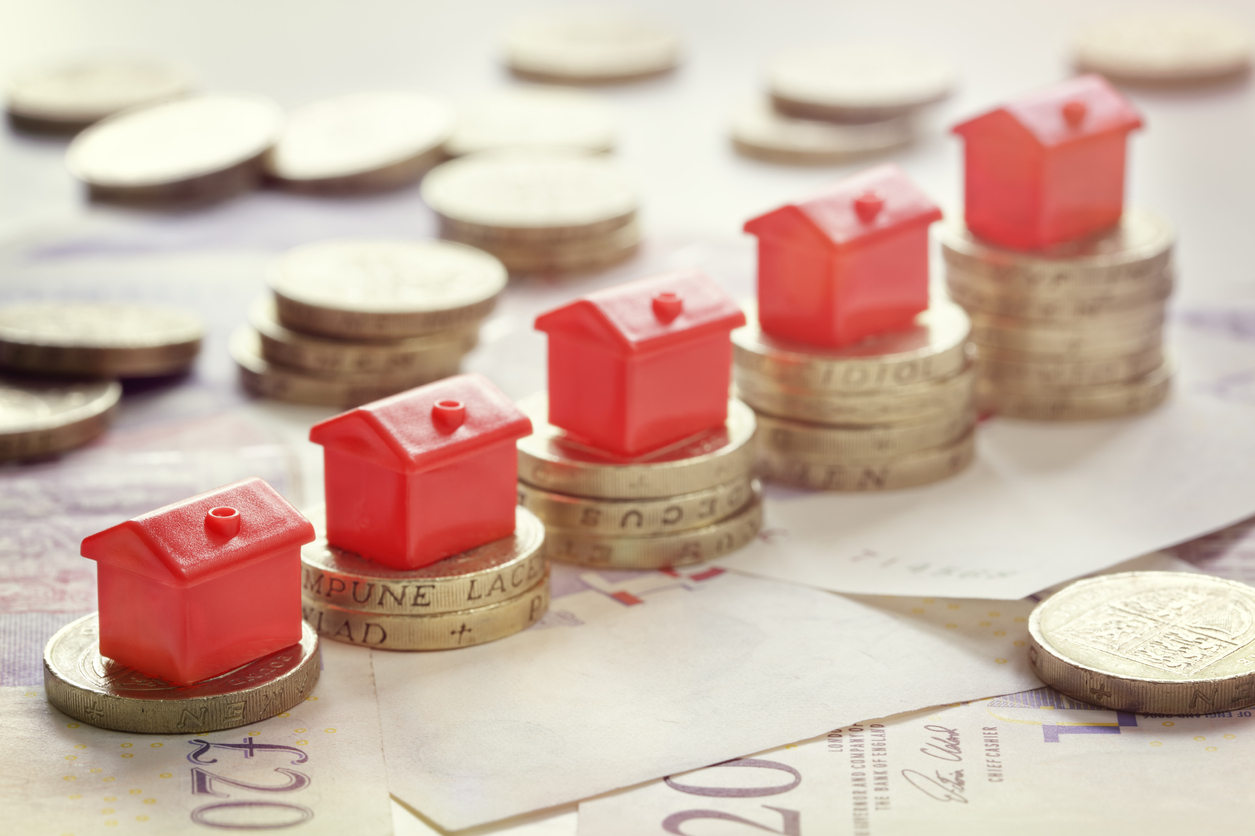

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Random Forest Regression](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section401)<br>
    - 4.2 [Splitting X and y into training and test datasets](#section402)<br>
    - 4.3 [Random Forest regression in scikit-learn](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using Mean Absolute Error (MAE)](#section501)<br>
    - 5.2 [Model Evaluation using Mean Squared Error (MSE)](#section502)<br>
    - 5.3 [Model Evaluation using Root Mean Squared Error (RMSE)](#section503)<br>
    - 5.4 [Model Evaluation using Mean Average Percentage Error (MAPE) subtracted from 100%](#section504)<br>
6. [Visualizing a Single Decision Tree from our Random Forest Model](#section6)<br>
7. [Feature Importances](#section7)<br>
8. [Visualizing the Actual & Predicted Values](#section8)<br>

<a id=section1></a>

## 1. Problem Statement

__SalePrice__ (in dollars) for a particular House as a __function__ of __81 explanatory variables__ describing (almost) every aspect of a House.

- We want to find a function that given input data for these 81 explanatory variables __predicts the SalePrice of a House__.

- Which feature __contribute__ to SalePrice?

- Visualize the __relationship__ between the _features_ and the _response_.

<a id=section2></a>

## 2. Data Loading and Description

- The dataset comprises of __1460 observations of 81 columns__. Below is a table showing names of all the columns and their description.

| Column Name | Description |
| --- | --- |
| Id | House Id |
| MSSubClass | The building class |
| MSZoning | The general zoning classification |
| LotFrontage | Linear feet of street connected to property |
| LotArea | Lot size in square feet |
| Street | Type of road access |
| Alley | Type of alley access |
| LotShape | General shape of property |
| LandContour | Flatness of the property |
| Utilities | Type of utilities available |
| LotConfig | Lot configuration |
| LandSlope | Slope of property |
| Neighborhood | Physical locations within Ames city limits |
| Condition1 | Proximity to main road or railroad |
| Condition2 | Proximity to main road or railroad (if a second is present) |
| BldgType | Type of dwelling |
| HouseStyle | Style of dwelling |
| OverallQual | Overall material and finish quality |
| OverallCond | Overall condition rating |
| YearBuilt | Original construction date |
| YearRemodAdd | Remodel date |
| RoofStyle | Type of roof |
| RoofMatl | Roof material |
| Exterior1st | Exterior covering on house |
| Exterior2nd | Exterior covering on house (if more than one material) |
| MasVnrType | Masonry veneer type |
| MasVnrArea | Masonry veneer area in square feet |
| ExterQual | Exterior material quality |
| ExterCond | Present condition of the material on the exterior |
| Foundation | Type of foundation |
| BsmtQual | Height of the basement |
| BsmtCond | General condition of the basement |
| BsmtExposure | Walkout or garden level basement walls |
| BsmtFinType1 | Quality of basement finished area |
| BsmtFinSF1 | Type 1 finished square feet |
| BsmtFinType2 | Quality of second finished area (if present) |
| BsmtFinSF2 | Type 2 finished square feet |
| BsmtUnfSF | Unfinished square feet of basement area |
| TotalBsmtSF | Total square feet of basement area |
| Heating | Type of heating |
| HeatingQC | Heating quality and condition |
| CentralAir | Central air conditioning |
| Electrical | Electrical system |
| 1stFlrSF | First Floor square feet |
| 2ndFlrSF | Second floor square feet |
| LowQualFinSF | Low quality finished square feet (all floors) |
| GrLivArea | Above grade (ground) living area square feet |
| BsmtFullBath | Basement full bathrooms |
| BsmtHalfBath | Basement half bathrooms |
| FullBath | Full bathrooms above grade |
| HalfBath | Half baths above grade |
| Bedroom | Number of bedrooms above basement level |
| Kitchen | Number of kitchens |
| KitchenQual | Kitchen quality |
| TotRmsAbvGrd | Total rooms above grade (does not include bathrooms) |
| Functional | Home functionality rating |
| Fireplaces | Number of fireplaces |
| FireplaceQu | Fireplace quality |
| GarageType | Garage location |
| GarageYrBlt | Year garage was built |
| GarageFinish | Interior finish of the garage |
| GarageCars | Size of garage in car capacity |
| GarageArea | Size of garage in square feet |
| GarageQual | Garage quality |
| GarageCond | Garage condition |
| PavedDrive | Paved driveway |
| WoodDeckSF | Wood deck area in square feet |
| OpenPorchSF | Open porch area in square feet |
| EnclosedPorch | Enclosed porch area in square feet |
| 3SsnPorch | Three season porch area in square feet |
| ScreenPorch | Screen porch area in square feet |
| PoolArea | Pool area in square feet |
| PoolQC | Pool quality |
| Fence | Fence quality |
| MiscFeature | Miscellaneous feature not covered in other categories |
| MiscVal | $Value of miscellaneous feature |
| MoSold | Month Sold |
| YrSold | Year Sold |
| SaleType | Type of sale |
| SaleCondition | Condition of sale |
| __SalePrice__ | __Property's Sale Price in dollars__ __(*This is the target variable that we are trying to predict*)__ |

### Importing Packages

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

from sklearn import metrics
from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

### Importing the Dataset

In [4]:
#Reading the data
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

What are the **features**?
- There are __81 features__. For example, __Id, MSSubclass, MSZoning, LotArea,__ etc.

What is the **response**?
- __SalePrice__: Property's Sale Price in dollars (*This is the target variable that we are trying to predict*)

<a id=section3></a>

## 3. Exploratory Data Analysis

In [5]:
#Checking dataset shape
data.shape

(1460, 81)

The dataset contains 1460 rows and 81 columns.

In [6]:
#Checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset contains __38 numerical features__ and __43 categorical features__.

In [7]:
#Checking dataset description
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="house_data_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __house_data_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

D:\Software_Installation_Directory\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180921.20 and sigma = 79415.29



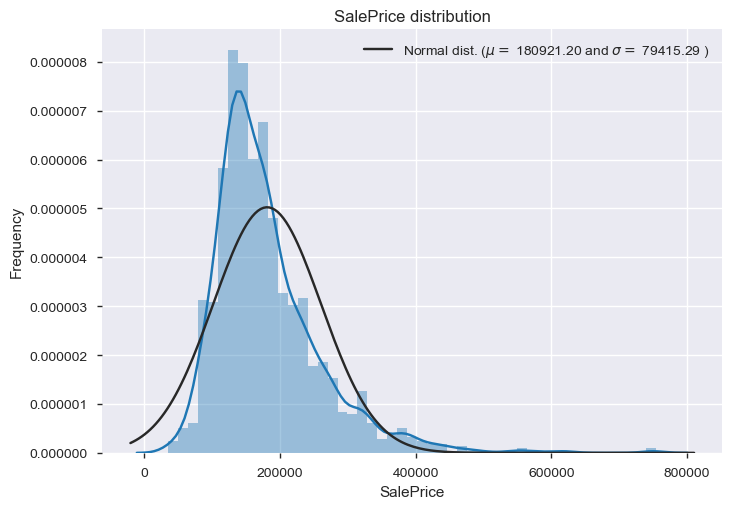

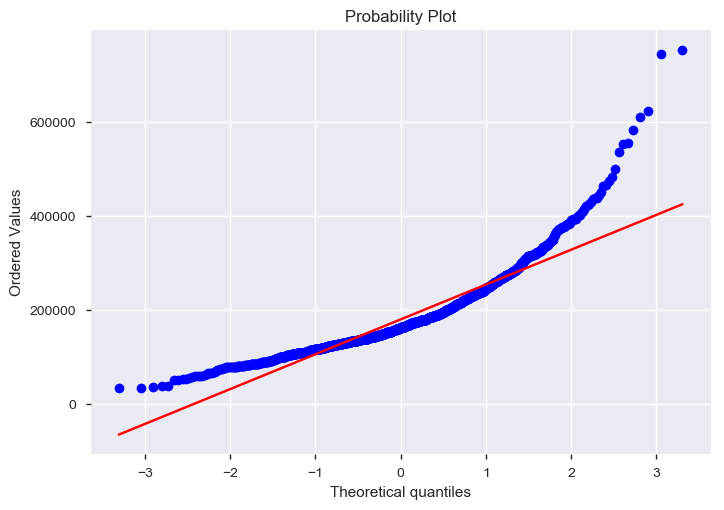

Skewness: 1.882876
Kurtosis: 6.536282


In [7]:
# Plot Histogram
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Looking at the kurtosis score, we can see that there is a very nice peak. However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution.

Text(0.5, 1.0, 'Correlation Matrix to Find out which Feature is most Related to SalePrice')

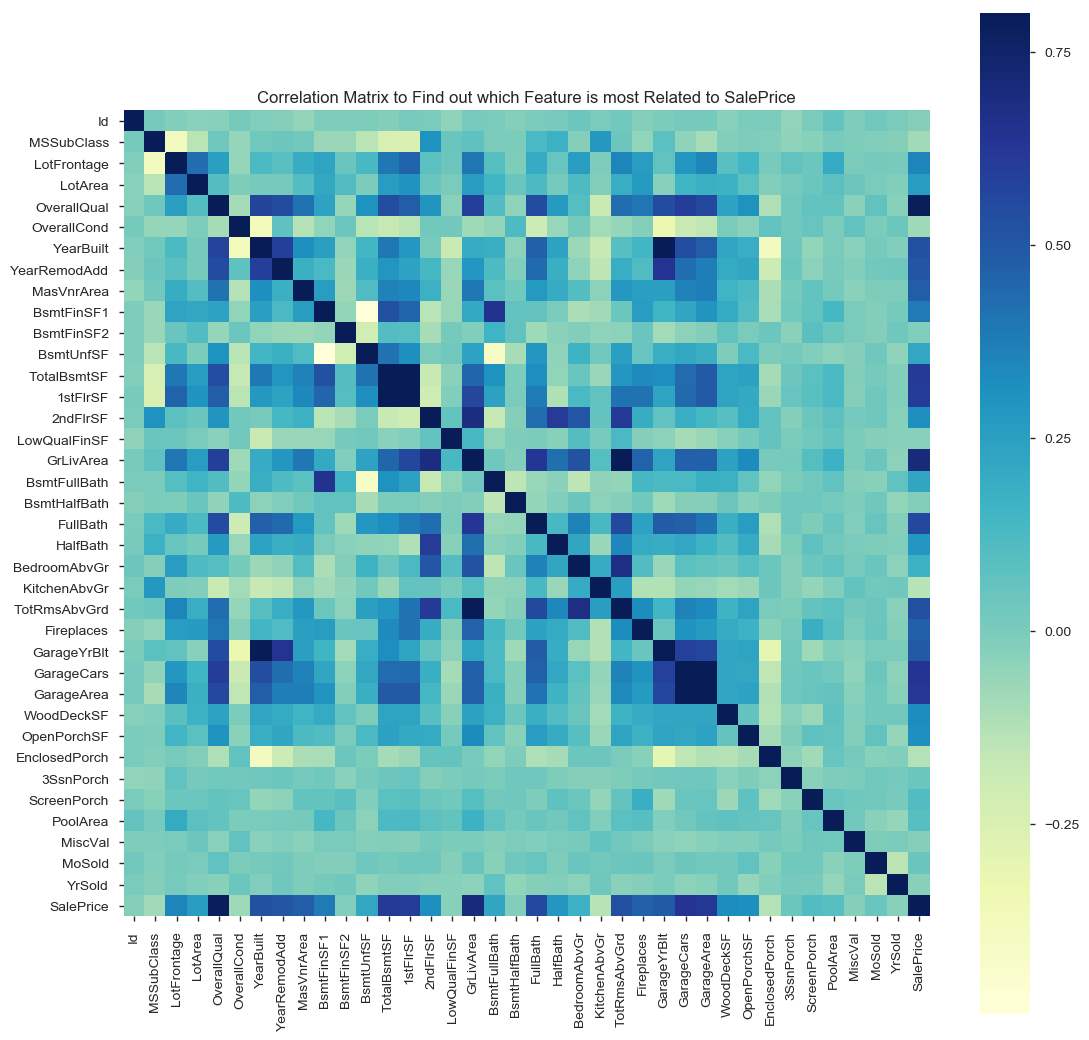

In [8]:
# Correlation Matrix Heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap='YlGnBu', linecolor ='black');
plt.title('Correlation Matrix to Find out which Feature is most Related to SalePrice')

It is difficult to comprehend from the above Correlation Matrix that which features are most correlated with __SalePrice__. So,  let's zoom into the top 10 features most related to Sale Price.

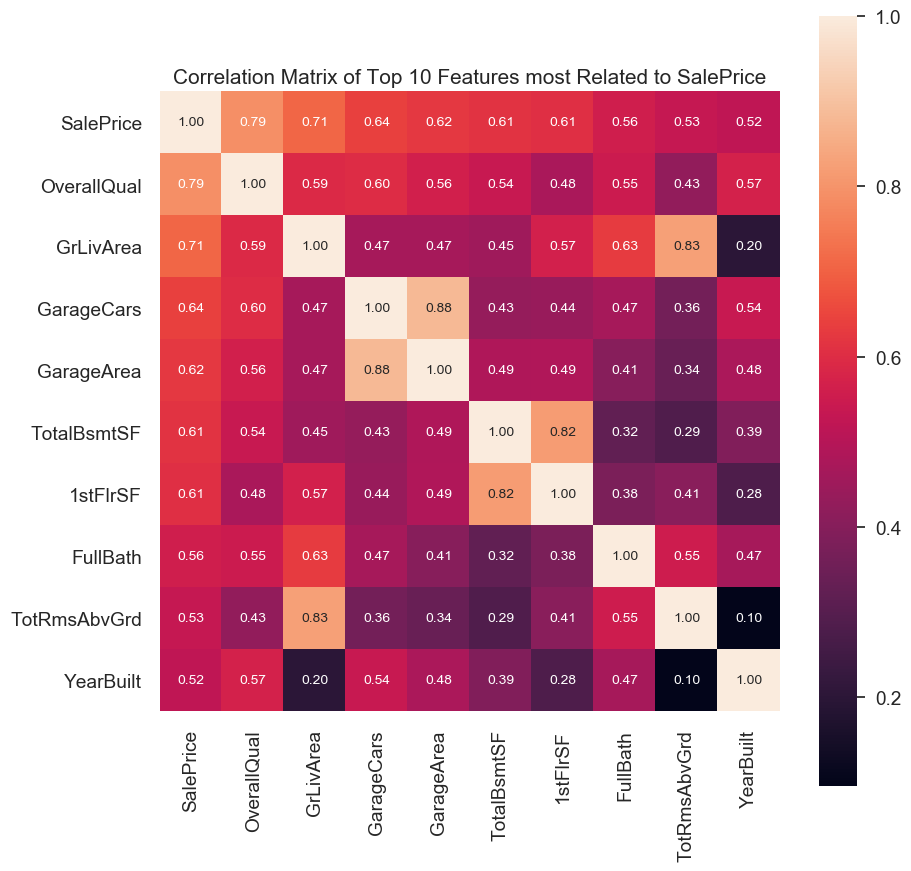

In [9]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
f1, ax1 = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Matrix of Top 10 Features most Related to SalePrice')
plt.show()

In [10]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

Most Correlated Features
0                SalePrice
1              OverallQual
2                GrLivArea
3               GarageCars
4               GarageArea
5              TotalBsmtSF
6                 1stFlrSF
7                 FullBath
8             TotRmsAbvGrd
9                YearBuilt

The above list shows the top 10 most correlated features to __SalePrice__. Let's take a look at how each relates to __SalePrice__.

#### OverallQual vs SalePrice

Text(0.5, 1.0, 'OverallQual vs SalePrice')

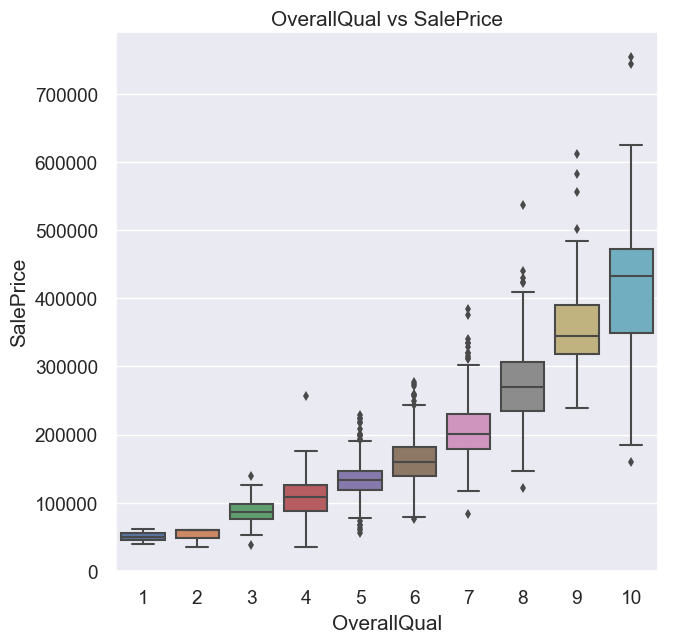

In [11]:
# OverallQual vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=data['OverallQual'], y=data['SalePrice'])
plt.title('OverallQual vs SalePrice')

__SalePrice__ increses with __OverallQual__. The distribution looks good.

#### GrLivArea vs SalePrice

D:\Software_Installation_Directory\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


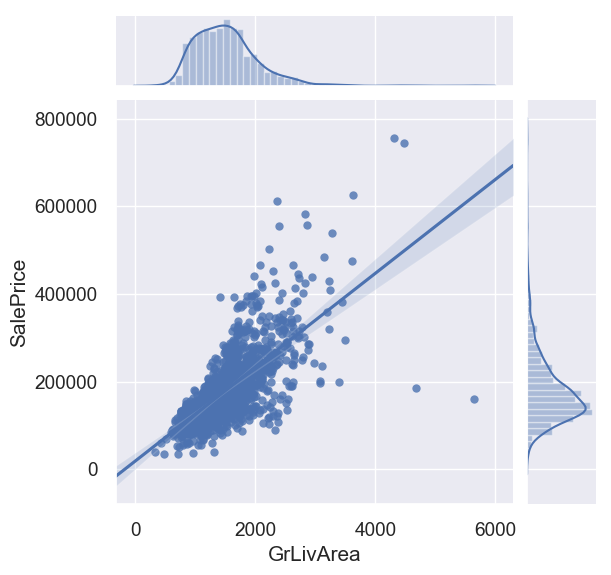

In [12]:
# GrLivArea vs SalePrice
sns.jointplot(x=data['GrLivArea'], y=data['SalePrice'], kind='reg')

- __SalePrice__ increases with __GrLivArea__.
- There are 2 outliers to this as we can see in the bottom-right of the plot. So, we have to remove these outliers for better data analysis.

In [13]:
# Removing outliers manually (Two points in the bottom right)
data = data.drop(data[(data['GrLivArea']>4000) 
                         & (data['SalePrice']<300000)].index).reset_index(drop=True)

D:\Software_Installation_Directory\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


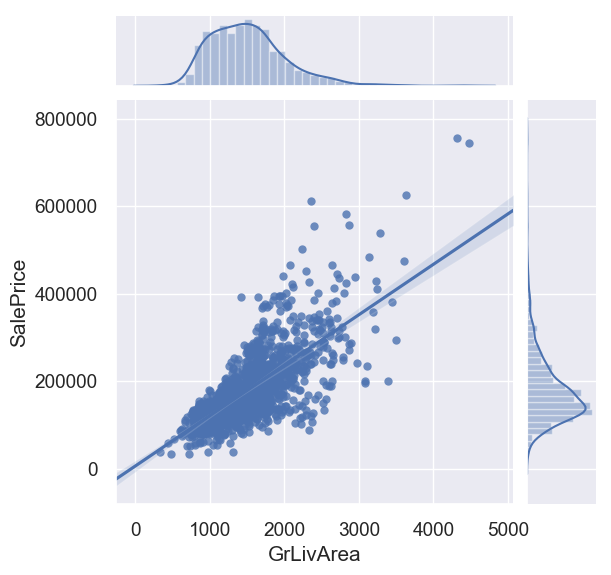

In [14]:
# GrLivArea vs SalePrice
sns.jointplot(x=data['GrLivArea'], y=data['SalePrice'], kind='reg')

The 2 outliers have been removed.

#### GarageCars vs SalePrice

Text(0.5, 1.0, 'GarageCars vs SalePrice')

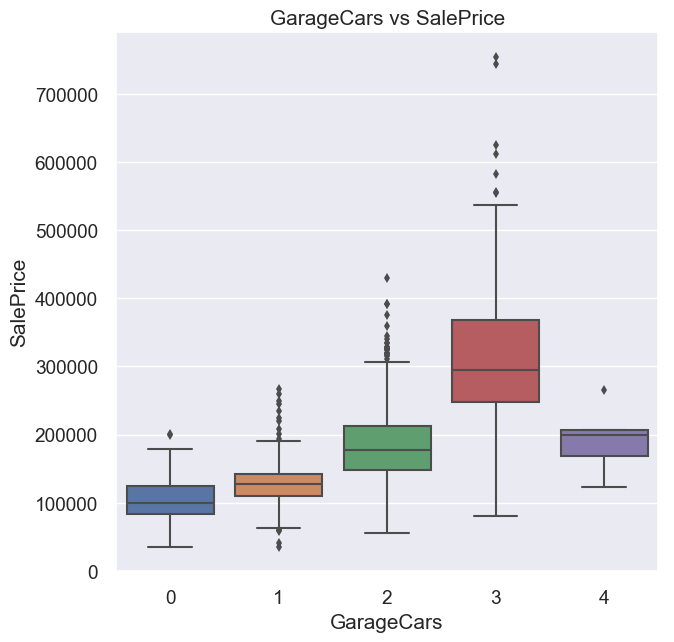

In [15]:
# GarageCars vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=data['GarageCars'], y=data['SalePrice'])
plt.title('GarageCars vs SalePrice')

- __SalePrice__ increases with __GarageCars__.
- There is 1 outlier to this as we can see in the right-side of the plot that 4-car garages result in less SalePrice. So, we will have to take care of this outlier.

In [16]:
# Removing outliers manually (More than 4-cars, less than $300k)
data = data.drop(data[(data['GarageCars']>3) 
                         & (data['SalePrice']<300000)].index).reset_index(drop=True)

Text(0.5, 1.0, 'GarageCars vs SalePrice')

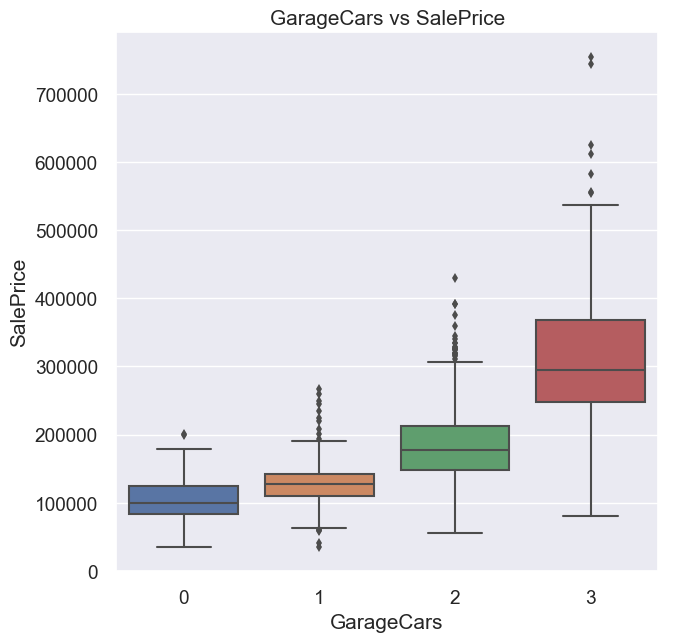

In [17]:
# GarageCars vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=data['GarageCars'], y=data['SalePrice'])
plt.title('GarageCars vs SalePrice')

The outlier has been removed.

#### GarageArea vs SalePrice

D:\Software_Installation_Directory\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


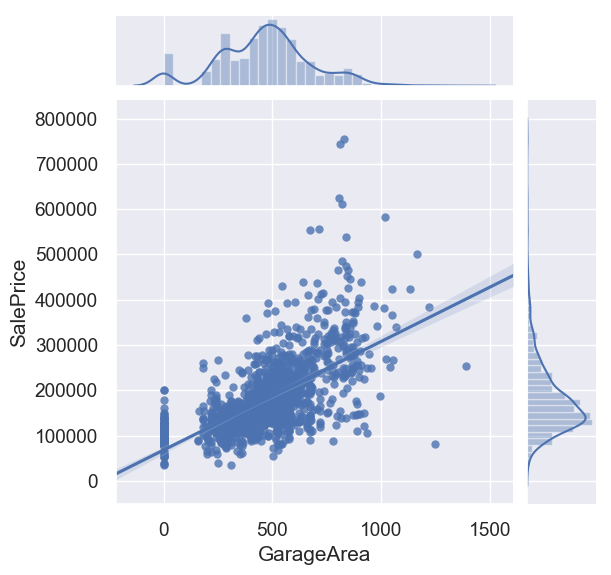

In [18]:
# GarageArea vs SalePrice
sns.jointplot(x=data['GarageArea'], y=data['SalePrice'], kind='reg')

- __SalePrice__ increases with __GarageArea__.
- There are 2 outliers to this as we can see in the bottom-right of the plot. Again, we will have to remove these 2 outliers.

In [19]:
# Removing outliers manually (More than 1200 sqft, less than $300k)
data = data.drop(data[(data['GarageArea']>1200) 
                         & (data['SalePrice']<300000)].index).reset_index(drop=True)

D:\Software_Installation_Directory\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


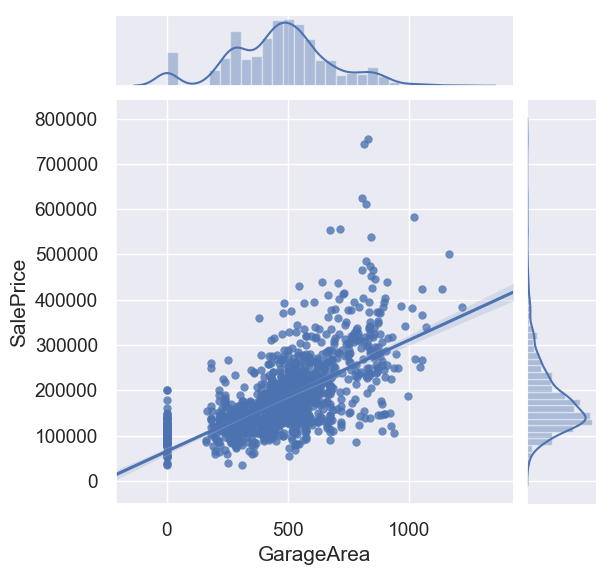

In [20]:
# GarageArea vs SalePrice
sns.jointplot(x=data['GarageArea'], y=data['SalePrice'], kind='reg')

The outliers have been removed.

#### TotalBsmtSF vs SalePrice

D:\Software_Installation_Directory\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


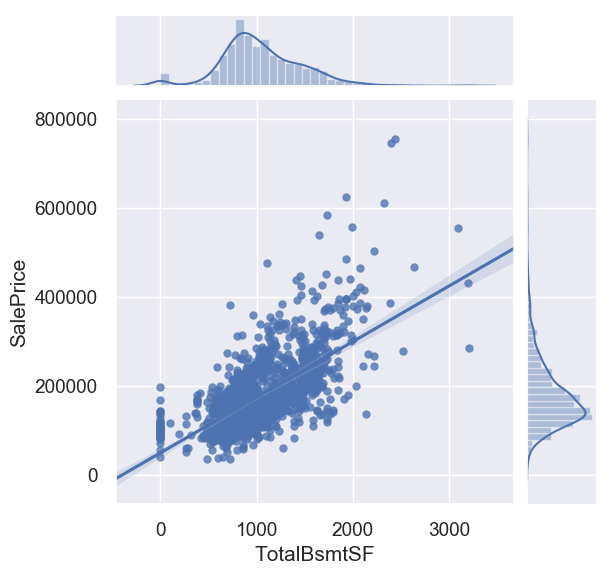

In [21]:
# TotalBsmtSF vs SalePrice
sns.jointplot(x=data['TotalBsmtSF'], y=data['SalePrice'], kind='reg')

- __SalePrice__ increases with __TotalBsmtSF__.
- There is 1 outlier to this as we can see in the bottom-right of the plot.

In [22]:
# Removing outliers manually (More than 3000 sqft, less than $400k)
data = data.drop(data[(data['TotalBsmtSF']>3000) 
                         & (data['SalePrice']<400000)].index).reset_index(drop=True)

D:\Software_Installation_Directory\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


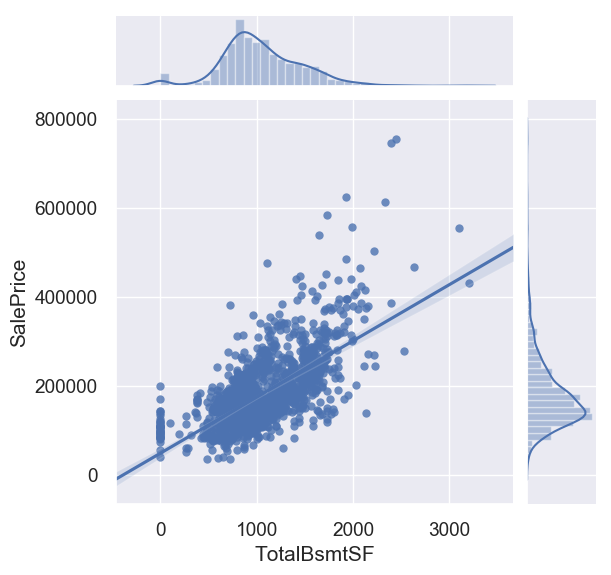

In [23]:
# TotalBsmtSF vs SalePrice
sns.jointplot(x=data['TotalBsmtSF'], y=data['SalePrice'], kind='reg')

The outlier has been removed.

#### 1stFlrSF vs SalePrice

D:\Software_Installation_Directory\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


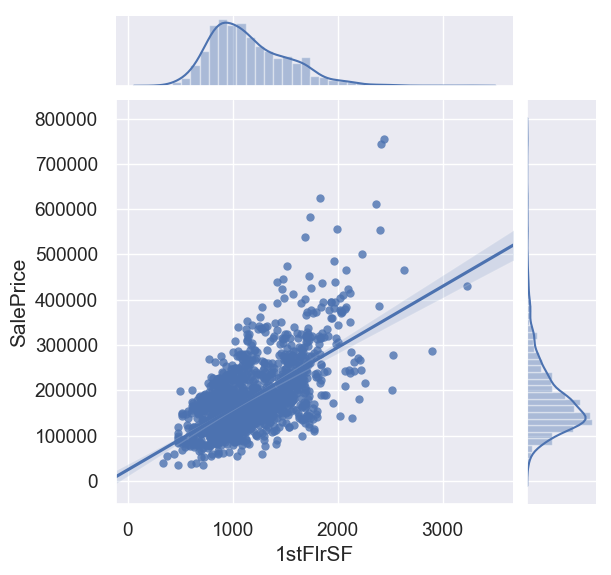

In [24]:
# 1stFlrSF vs SalePrice
sns.jointplot(x=data['1stFlrSF'], y=data['SalePrice'], kind='reg')

__SalePrice__ increases with __1stFlrSF__. The distribution looks good.

#### FullBath vs SalePrice

Text(0.5, 1.0, 'FullBath vs SalePrice')

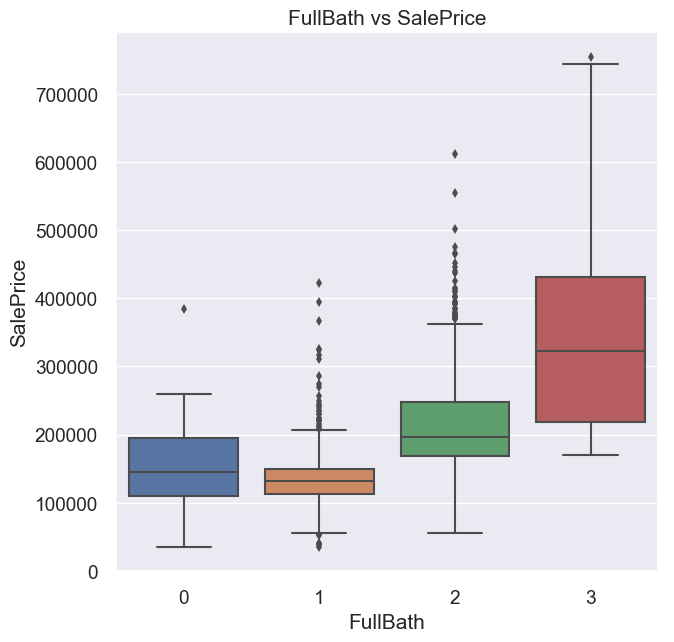

In [25]:
# FullBath vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=data['FullBath'], y=data['SalePrice'])
plt.title('FullBath vs SalePrice')

__SalePrice__ increases with number of __FullBath__. The distribution looks good.

#### TotRmsAbvGrd vs SalePrice

Text(0.5, 1.0, 'TotRmsAbvGrd vs SalePrice')

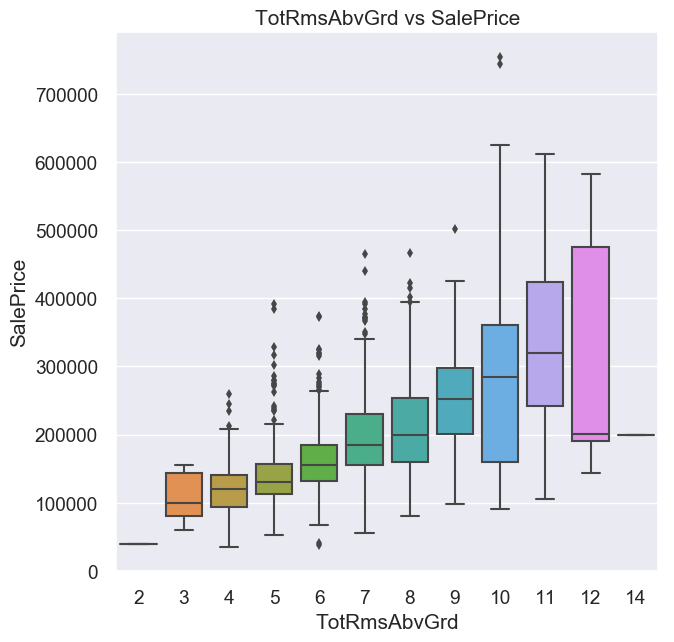

In [26]:
# TotRmsAbvGrd vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=data['TotRmsAbvGrd'], y=data['SalePrice'])
plt.title('TotRmsAbvGrd vs SalePrice')

- __SalePrice__ overall increses with __TotRmsAbvGrd__.
- There is 1 outlier to this as we can see that 14 Rooms house has a SalePrice less than even 7 Rooms house. So, we will have to take care of this outlier.

In [27]:
# Removing outliers manually (More than 12-Rooms, less than $300k)
data = data.drop(data[(data['TotRmsAbvGrd']>12) 
                         & (data['SalePrice']<300000)].index).reset_index(drop=True)

Text(0.5, 1.0, 'TotRmsAbvGrd vs SalePrice')

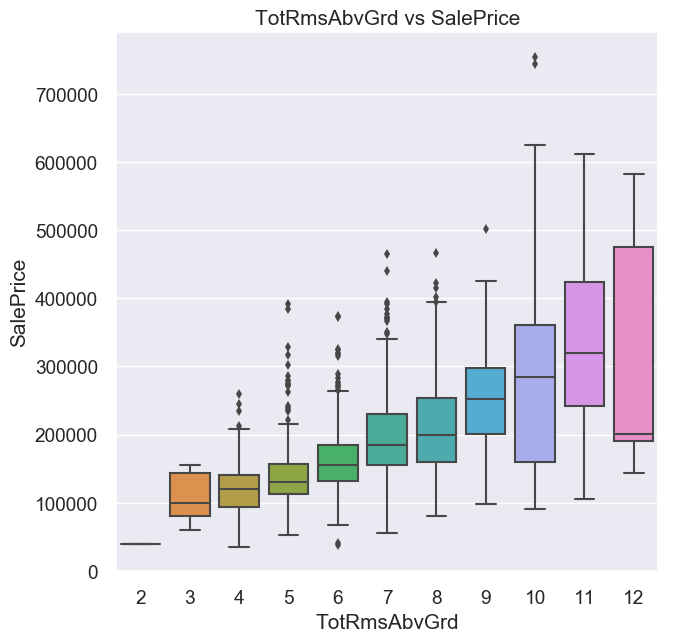

In [28]:
# TotRmsAbvGrd vs SalePrice
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x=data['TotRmsAbvGrd'], y=data['SalePrice'])
plt.title('TotRmsAbvGrd vs SalePrice')

The outlier has been removed.

#### YearBuilt vs SalePrice

Text(0.5, 1.0, 'YearBuilt vs SalePrice')

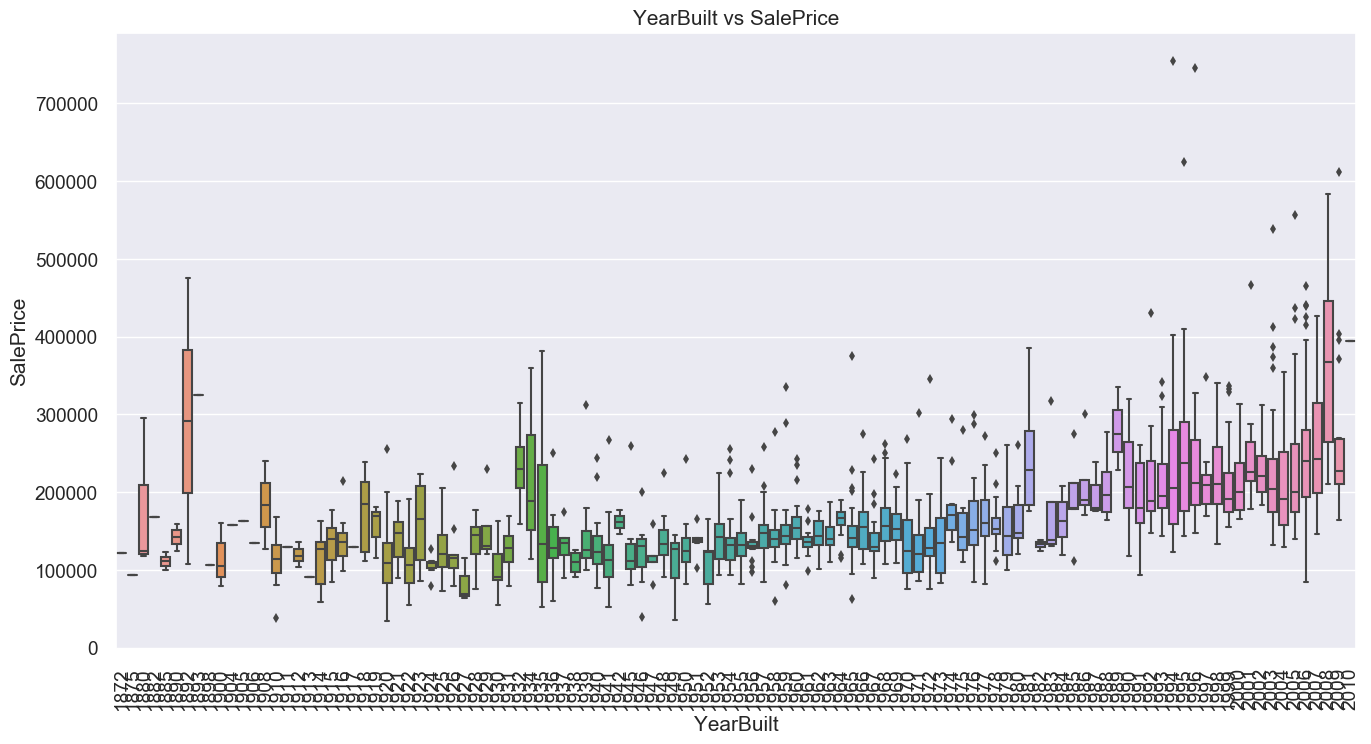

In [29]:
# YearBuilt vs SalePrice
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x=data['YearBuilt'], y=data['SalePrice'])
plt.xticks(rotation=90);
plt.title('YearBuilt vs SalePrice')

__SalePrice__ in general is more for new houses than old houses.

### Dealing with Missing Values

In [30]:
#Checking which columns have missing values
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       258
LotArea             0
Street              0
Alley            1360
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       685
GarageType         80
GarageYrBlt        80
GarageFinish       80
GarageCars          0
GarageArea          0
GarageQual         80
GarageCond         80
PavedDrive

- Whichever feature column has more than __50% missing values, that is, more than 730 missing values__, we are going to drop that feature column.

- Whichever feature column has less than __50% missing values, that is, less than 730 missing values__, we are going to keep that feature column.<br/>
    - If the feature column is a __numerical column__, then we are going to replace the missing values with the __median__ values.
    - If the feature column is a __categorical column__, then we are going to replace the missing values with the __mode__ value.

In [31]:
#From the house_data_before_preprocessing.html file we can see that 'Alley','FireplaceQu','Fence','MiscFeature','PoolQC' have more than 50% missing values, so dropping them
data.drop(['Alley','FireplaceQu','Fence','MiscFeature','PoolQC'], axis=1, inplace=True)

In [32]:
# replace NaN values! If categorical feature column then using mode, otherwise median
for col in data:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

In [33]:
#Checking for missing values again
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

We can see that all the missing values have been taken care of.

### Feature Engineering

The __Year & Month__ related features have been interpreted as numerical when they are actually categorical. Thus, we need to transform these features from numerical to categorical.

In [34]:
#Year and Month Features are transformed into categorical features.
data['YearBuilt'] = data['YearBuilt'].astype(str)
data['YearRemodAdd'] = data['YearRemodAdd'].astype(str)
data['GarageYrBlt'] = data['GarageYrBlt'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

There are some categorical features that actually has a particular order just like in __feedback forms (Ex, VGood, Good, Fair, Poor)__. Few examples of such ordinal categorical features in the dataset are: __BsmtQual, KitchenQual, GarageQual__ etc.

In [35]:
# Finding out the number of unique values contained in these ordinal categorical columns
print("BsmtQual Unique Values: {}".format(data['BsmtQual'].unique()))
print("BsmtCond Unique Values: {}".format(data['BsmtCond'].unique()))
print("ExterQual Unique Values: {}".format(data['ExterQual'].unique()))
print("ExterCond Unique Values: {}".format(data['ExterCond'].unique()))
print("GarageQual Unique Values: {}".format(data['GarageQual'].unique()))
print("GarageCond Unique Values: {}".format(data['GarageCond'].unique()))
print("HeatingQC Unique Values: {}".format(data['HeatingQC'].unique()))
print("KitchenQual Unique Values: {}".format(data['KitchenQual'].unique()))

BsmtQual Unique Values: ['Gd' 'TA' 'Ex' 'Fa']
BsmtCond Unique Values: ['TA' 'Gd' 'Fa' 'Po']
ExterQual Unique Values: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond Unique Values: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
GarageQual Unique Values: ['TA' 'Fa' 'Gd' 'Ex' 'Po']
GarageCond Unique Values: ['TA' 'Fa' 'Gd' 'Po' 'Ex']
HeatingQC Unique Values: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual Unique Values: ['Gd' 'TA' 'Ex' 'Fa']


- Now, we will transform the ordinal categorical features to numerical features as per the following scheme:


| Rating | Value |
| --- | --- |
| Ex | 4 |
| Gd | 3 |
| TA | 2 |
| Fa | 1 |
| Po | 0 |

In [36]:
# Transforming the ordinal categorical features to numerical features
data.BsmtQual.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
data.BsmtCond.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
data.ExterQual.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
data.ExterCond.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
data.GarageQual.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
data.GarageCond.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
data.HeatingQC.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)
data.KitchenQual.replace(to_replace=['Ex','Gd','TA','Fa','Po'], value=[4,3,2,1,0], inplace=True)

In [37]:
# Making sure that the data type of these ordinal categorical features is of integer type
data['BsmtQual'] = data['BsmtQual'].astype(np.int64)
data['BsmtCond'] = data['BsmtCond'].astype(np.int64)
data['ExterQual'] = data['ExterQual'].astype(np.int64)
data['ExterCond'] = data['ExterCond'].astype(np.int64)
data['GarageQual'] = data['GarageQual'].astype(np.int64)
data['GarageCond'] = data['GarageCond'].astype(np.int64)
data['HeatingQC'] = data['HeatingQC'].astype(np.int64)
data['KitchenQual'] = data['KitchenQual'].astype(np.int64)

In [38]:
# Finding out the list of categorical features in the dataset after all the transformations
data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
# Finding out the list of numerical features in the dataset after all the transformations
data.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [40]:
#Creating encoding feature columns corresponding to categorical feature columns
data = pd.get_dummies(data, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], drop_first=True)

In [41]:
# Making House Ids as the index of the data frame
data.set_index('Id', inplace=True)

In [42]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="house_data_after_preprocessing.html")

Now, we have preprocessed the data. Now, the dataset does not contain missing values. We have also introduced new features by encoding categorical feature columns. We have transformed some feature columns as well. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __house_data_after_preprocessing.html__ and __house_data_before_preprocessing.html__.<br/>
In __house_data_after_preprocessing.html__ report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __feature columns__ = __490__ 
- Observe the newly created encoded feature columns __BldgType_2fmCon__, __BldgType_Duplex__, __SaleCondition_Normal__, etc. Click on Toggle details to get more detailed information about it.

<a id=section4></a>

## 4. Random Forest Regression

<a id=section401></a>

### 4.1 Preparing X and y using pandas

In [43]:
# Preparing the predictors dataset
X = data.loc[:,data.columns != 'SalePrice']
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
Id                                                                           
1           60         65.0     8450            7            5       196.0   
2           20         80.0     9600            6            8         0.0   
3           60         68.0    11250            7            5       162.0   
4           70         60.0     9550            7            5         0.0   
5           60         84.0    14260            8            5       350.0   

    ExterQual  ExterCond  BsmtQual  BsmtCond  ...  SaleType_ConLI  \
Id                                            ...                   
1           3          2         3         2  ...               0   
2           2          2         3         2  ...               0   
3           3          2         3         2  ...               0   
4           2          2         2         3  ...               0   
5           3          2         3         2  ...               0   

    SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
Id                                                            
1                0             0             0            1   
2                0             0             0            1   
3                0             0             0            1   
4                0             0             0            1   
5                0             0             0            1   

    SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                      
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
5                       0                     0                     0   

    SaleCondition_Normal  SaleCondition_Partial  
Id                                               
1                      1                      0  
2                      1                      0  
3                      1                      0  
4                      0                      0  
5                      1                      0  

[5 rows x 488 columns]

In [44]:
# Preparing the response dataset
y = data.SalePrice
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

<a id=section402></a>

### 4.2 Splitting X and y into training and test datasets.

In [45]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)

In [47]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1304, 488)
y_train Shape: (1304,)
X_test Shape: (145, 488)
y_test Shape: (145,)


<a id=section403></a>

### 4.3 Random Forest in scikit-learn

In [48]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

D:\Software_Installation_Directory\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [49]:
# Instantiate model with 260 decision trees
model = RandomForestRegressor(n_estimators = 260, random_state = 1)

# Train the model on training data
model.fit(X_train, y_train);

<a id=section404></a>

### 4.4 Using the Model for Prediction

In [50]:
# Use the forest's predict method on the train data
y_pred_train = model.predict(X_train)

# Use the forest's predict method on the test data
y_pred_test = model.predict(X_test)

<a id=section5></a>

## 5. Model Evaluation

<a id=section501></a>

### 5.1 Model Evaluation using __Mean Absolute Error (MAE)__

In [51]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [52]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 6420.184756960831
MAE for test set is 15517.147931034484


<a id=section502></a>

### 5.2 Model Evaluation using __Mean Squared Error (MSE)__

In [53]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [54]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 99219038.06729667
MSE for test set is 617984719.656055


<a id=section503></a>

### 5.3 Model Evaluation using __Root Mean Squared Error (RMSE)__

In [55]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [56]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 9960.875366517577
RMSE for test set is 24859.298454623673


<a id=section504></a>

### 5.4 Model Evaluation using Mean Average Percentage Error (MAPE) subtracted from 100 %.

In [57]:
# Calculate the absolute errors
errors_train = abs(y_pred_train - y_train)
errors_test = abs(y_pred_test - y_test)

# Calculate mean absolute percentage error (MAPE)
mape_train = 100 * (errors_train / y_train)
mape_test = 100 * (errors_test / y_test)

# Calculate and display accuracy
accuracy_train = 100 - np.mean(mape_train)
print('Accuracy for Training Data:', round(accuracy_train, 2), '%.')
accuracy_test = 100 - np.mean(mape_test)
print('Accuracy for Testing Data:', round(accuracy_test, 2), '%.')

Accuracy for Training Data: 96.23 %.
Accuracy for Testing Data: 90.68 %.


That looks pretty good! Our model has learned how to predict the __SalePrice of a House__ with __90.68% accuracy__.

<a id=section6></a>

## 6. Visualizing a Single Decision Tree from our Random Forest Model

In [58]:
feature_list = list(X.columns)

In [59]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [60]:
# Pull out one tree from the forest
tree = model.estimators_[50]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

That looks like quite an expansive tree with 24 layers. Let's take a zoomed-in look at one of the cross-section of the Tree.

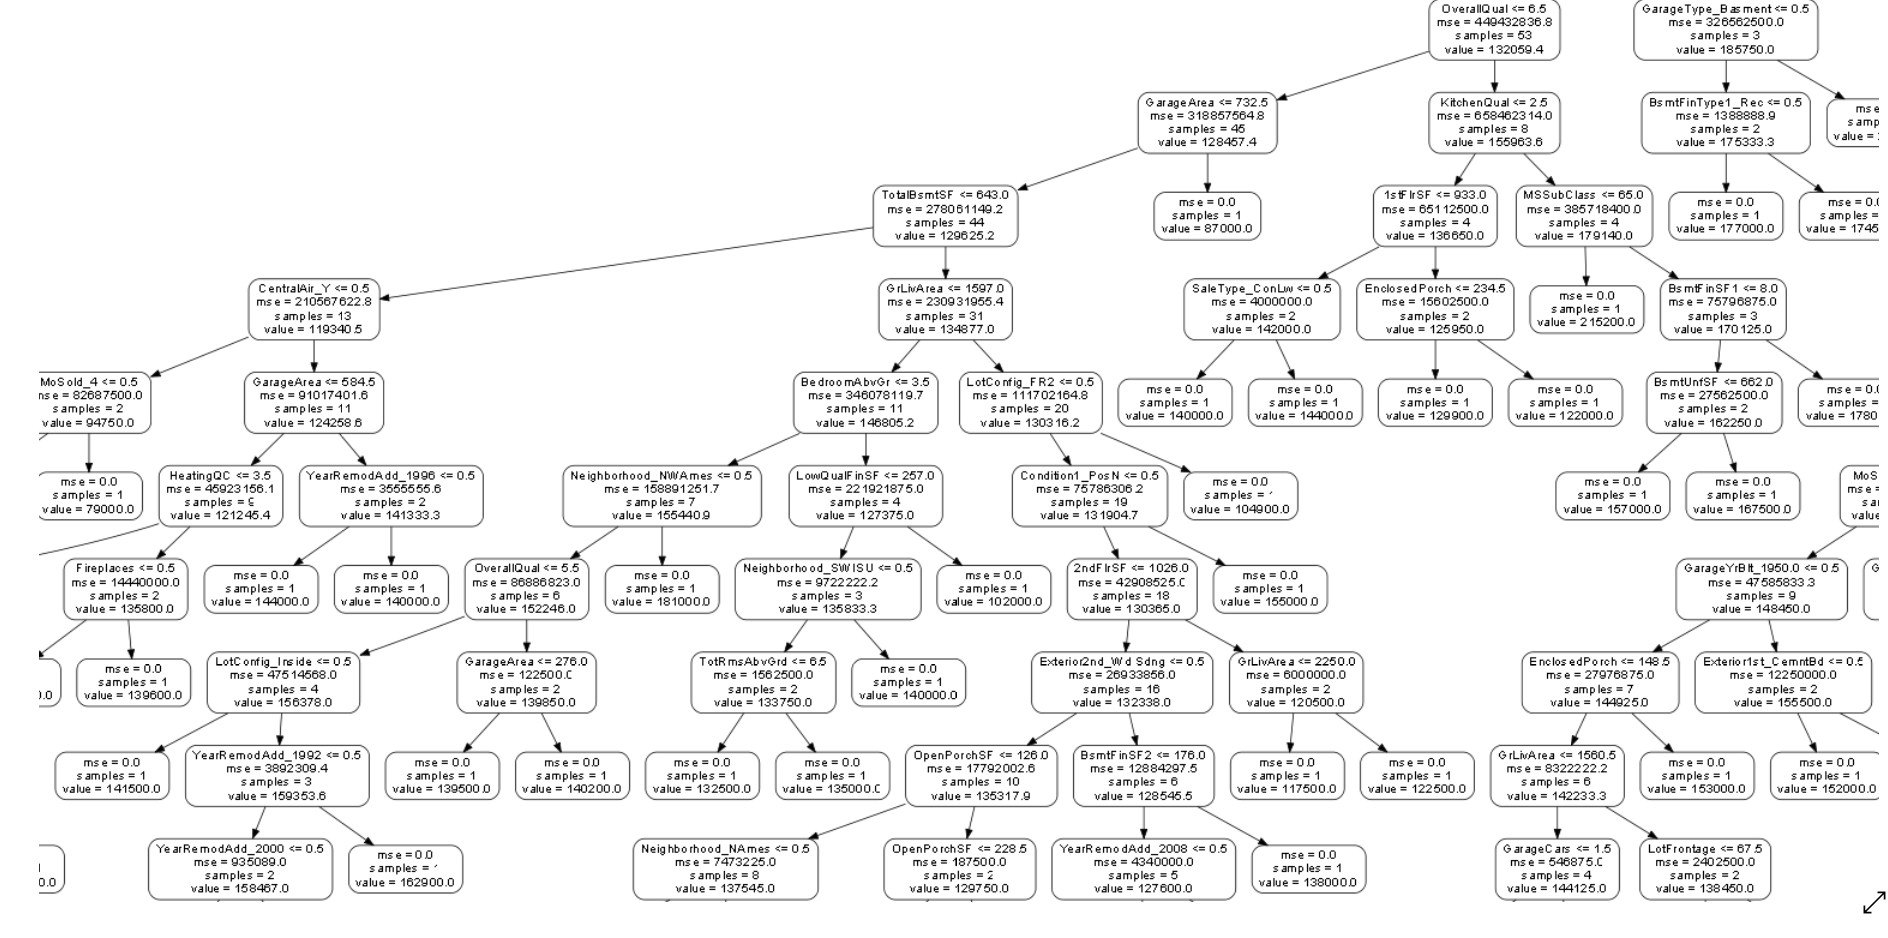

<a id=section7></a>

## 7. Feature Importances

In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the features.

In [61]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OverallQual          Importance: 0.59
Variable: GrLivArea            Importance: 0.11
Variable: TotalBsmtSF          Importance: 0.06
Variable: BsmtFinSF1           Importance: 0.03
Variable: 1stFlrSF             Importance: 0.02
Variable: GarageCars           Importance: 0.02
Variable: GarageArea           Importance: 0.02
Variable: LotArea              Importance: 0.01
Variable: ExterQual            Importance: 0.01
Variable: BsmtQual             Importance: 0.01
Variable: BsmtUnfSF            Importance: 0.01
Variable: 2ndFlrSF             Importance: 0.01
Variable: KitchenQual          Importance: 0.01
Variable: TotRmsAbvGrd         Importance: 0.01
Variable: WoodDeckSF           Importance: 0.01
Variable: MSSubClass           Importance: 0.0
Variable: LotFrontage          Importance: 0.0
Variable: OverallCond          Importance: 0.0
Variable: MasVnrArea           Importance: 0.0
Variable: ExterCond            Importance: 0.0
Variable: BsmtCond             Importance: 0.

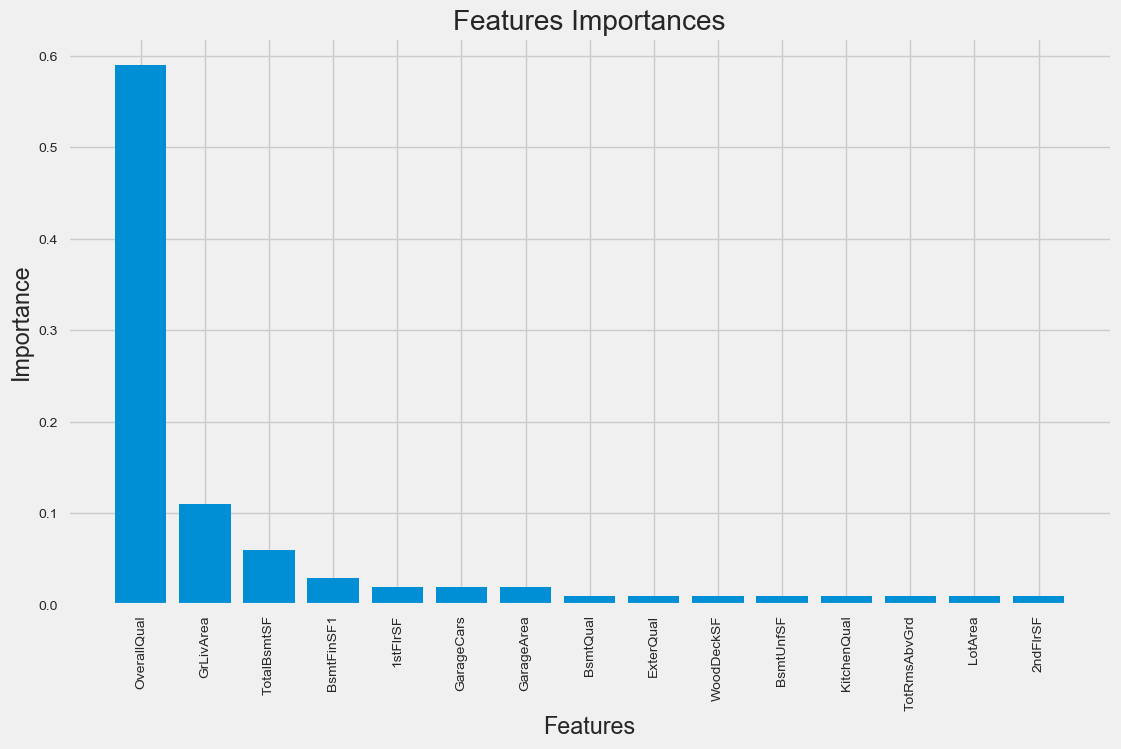

In [62]:
importances1 = [(round(importance,2)) for importance in (importances)]
feature_importances1 = pd.DataFrame(data = {'Importance': list(importances1), 'Features': feature_list})
feature_importances1.sort_values(by=['Importance'], ascending=False, inplace=True)
imp_features = list(feature_importances1[feature_importances1['Importance']>0].Features)
importances2 = list(feature_importances1[feature_importances1['Importance']>0].Importance)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances2)))

# Make a bar chart
f, ax = plt.subplots(figsize=(12, 7))
plt.bar(x_values, importances2, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, imp_features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Features Importances');

- From the above observations we can see that:<br/>
    - __OverallQual (with 59% importance among all the features)__ is the most important feature in determining the __SalePrice__ of a House.
    - The other features that influence the __SalePrice__ of a House include __GrLivArea, TotalBsmtSF, BsmtFinSF1, 1stFlrSF, GarageArea, TotRmsAbvGrd, BsmtUnfSF, BsmtQual, ExterQual, GarageCars, WoodDeckSF, KitchenQual, LotArea & 2ndFlrSF__.
    - The above mentioned __15 features__ together contribute __93%__ in determining the __SalePrice__ of a House.
    - The rest of the features contribute just __7%__ in determination of __SalePrice__ of a House.

<a id=section8></a>

## 8. Visualizing the Actual & Predicted Values

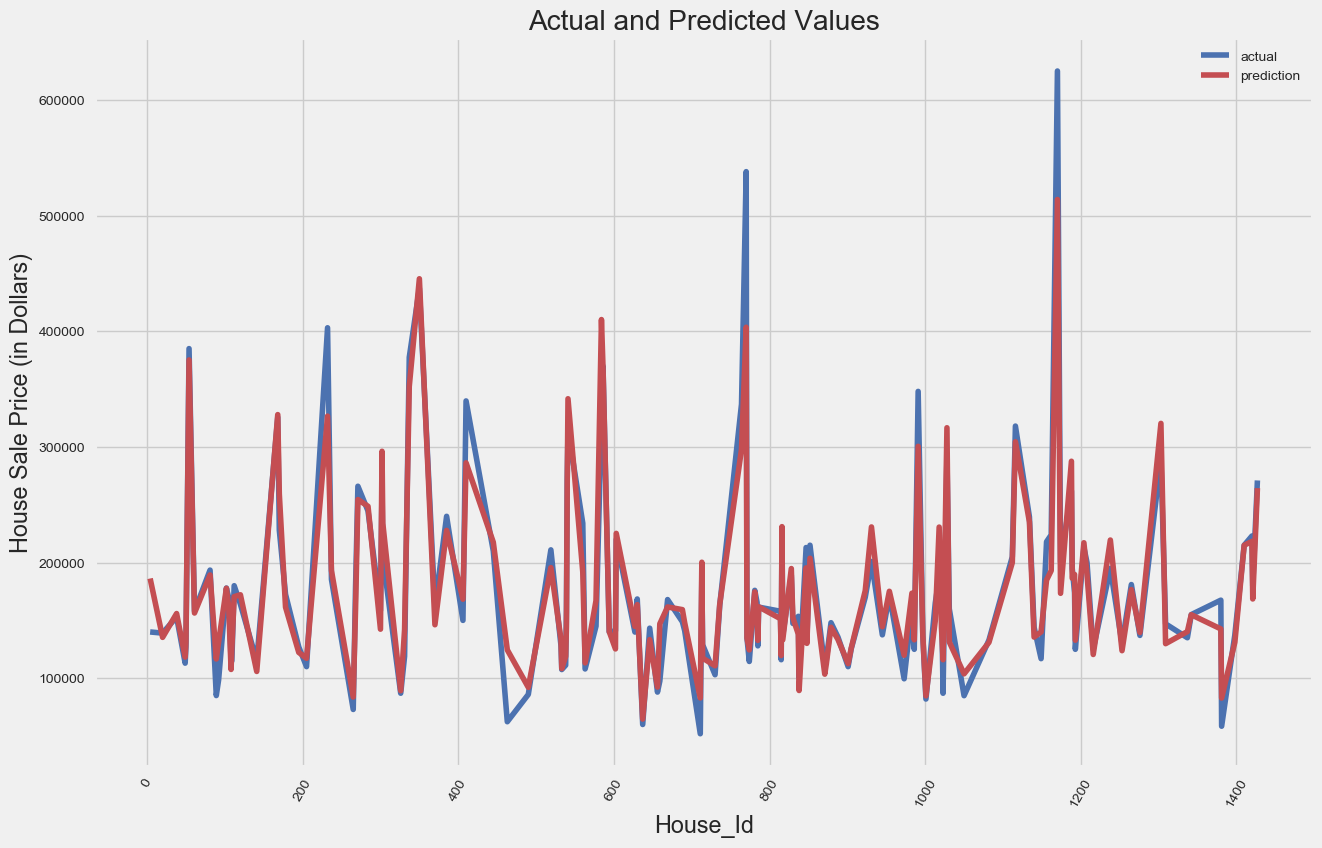

In [63]:
# Dataframe with Test Data IDs and Test Data Actual Sale Price
true_data = pd.DataFrame(data = {'Id': list(y_test.index), 'Actual_SalePrice': list(y_test)})
true_data.sort_values(by=['Id'], inplace=True)

# Dataframe with Test Data IDs and Test Data Predicted Sale Price
predictions_data = pd.DataFrame(data = {'Id': list(y_test.index), 'Predicted_SalePrice': list(y_pred_test)})
predictions_data.sort_values(by=['Id'], inplace=True)

# Plot the actual values
f, ax = plt.subplots(figsize=(14, 9))
plt.plot(true_data['Id'], true_data['Actual_SalePrice'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['Id'], predictions_data['Predicted_SalePrice'], 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('House_Id'); plt.ylabel('House Sale Price (in Dollars)'); plt.title('Actual and Predicted Values');

A nice plot to check how our model has performed. By observing the overlapping between the __Actual & Predicted__ values, we can conclude that our model has performed fairly well.